<a href="https://colab.research.google.com/github/datasriram/task-1-netflix-cleaning/blob/main/netflix_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Head of dataset:
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septem

/tmp/ipython-input-283195855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = df['date_added'].str.strip()
/tmp/ipython-input-283195855.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
/tmp/ipython-input-283195855.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

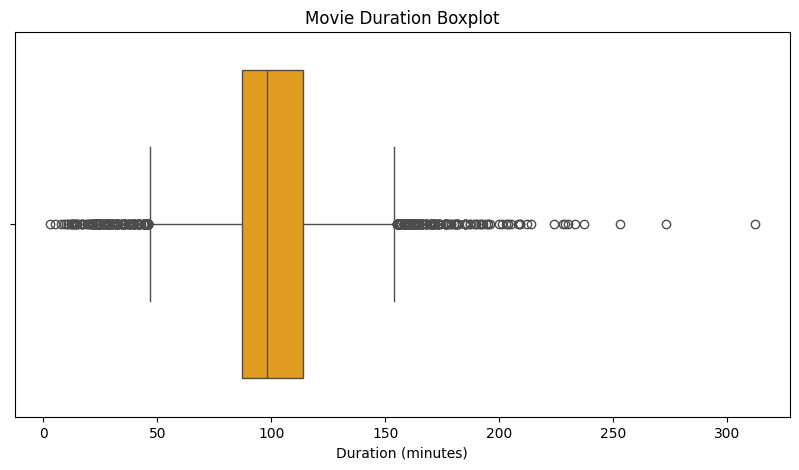


✅ Netflix data cleaning & preprocessing complete.


In [6]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load the Netflix Dataset from GitHub
url = 'https://raw.githubusercontent.com/datasriram/task-1-netflix-cleaning/main/netflix_titles.csv'
df = pd.read_csv(url)

# STEP 3: Basic Dataset Info
print("🔹 Head of dataset:\n", df.head())
print("\n🔹 Info:\n")
df.info()
print("\n🔹 Summary stats:\n", df.describe(include='all'))
print("\n🔹 Missing values:\n", df.isnull().sum())

# STEP 4: Handling Missing Values (clean + no warnings)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df = df.dropna(subset=['date_added'])

# STEP 5: Convert 'date_added' to datetime & extract features
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# STEP 6: Encode 'type' Column (Movie=0, TV Show=1)
df['type_encoded'] = df['type'].map({'Movie': 0, 'TV Show': 1})

# STEP 7: Visualize Outliers — Duration (only for Movies)
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 5))
sns.boxplot(data=movie_df, x='duration_mins', color='orange')
plt.title("Movie Duration Boxplot")
plt.xlabel("Duration (minutes)")
plt.show()

# STEP 8: Export Cleaned Dataset (optional)
df.to_csv('cleaned_netflix_data.csv', index=False)

print("\n✅ Netflix data cleaning & preprocessing complete.")




